**Import Libraries**

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

1. **Load and Explore the Dataset**

In [2]:

# Load dataset
df = pd.read_csv('/content/sample_data/project1_df.csv')

# Explore dataset: get the first few rows
print(df.head())

# Get dataset info (to understand data types, missing values)
print(df.info())

# Statistical summary of numerical features
print(df.describe())


      CID         TID  Gender     Age Group        Purchase Date  \
0  943146  5876328741  Female         25-45  30/08/2023 20:27:08   
1  180079  1018503182    Male         25-45  23/02/2024 09:33:46   
2  337580  3814082218   Other  60 and above  06/03/2022 09:09:50   
3  180333  1395204173   Other  60 and above  04/11/2020 04:41:57   
4  447553  8009390577    Male         18-25  31/05/2022 17:00:32   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          Clothing              Yes  SEASONALOFFER21                 211.54   
3  Sports & Fitness               No              NaN                   0.00   
4  Sports & Fitness              Yes         WELCOME5                 439.92   

   Gross Amount   Net Amount Purchase Method   Location  
0    725.304000   661.004000     Credit Card  Ahmeda

**2. Handle Missing or Incorrect Data**

1.1 now need to handle missing or incorrect data to ensure the dataset is clean. I can either remove rows/columns with missing data or impute them with some values.

In [5]:
# Assuming you've already loaded the dataset into a pandas DataFrame 'df'
missing_data = df.isnull().sum()
print(missing_data)

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64


1.2 Handle Missing Numerical Data

In [6]:
df['Discount Amount (INR)'].fillna(df['Discount Amount (INR)'].mean(), inplace=True)
df['Gross Amount'].fillna(df['Gross Amount'].mean(), inplace=True)
df['Net Amount'].fillna(df['Net Amount'].mean(), inplace=True)


<ipython-input-6-3e598135c285>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount Amount (INR)'].fillna(df['Discount Amount (INR)'].mean(), inplace=True)
<ipython-input-6-3e598135c285>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

1.3 Handle Missing Categorical Data

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Age Group'].fillna("Unknown", inplace=True)
df['Product Category'].fillna(df['Product Category'].mode()[0], inplace=True)


<ipython-input-7-672917486018>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-7-672917486018>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

1.4 Handle Incorrect Data

In [9]:
df['Discount Availed'] = df['Discount Availed'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')



In [36]:
# Convert Purchase Date to datetime format with dayfirst set to True
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], dayfirst=True)

# Create a new column for the date in YYYY-MM-DD format
df['Purchase Date Only'] = df['Purchase Date'].dt.strftime('%Y-%m-%d')

# Create a new column for the time in HH:MM:SS format
df['Purchase Time'] = df['Purchase Date'].dt.strftime('%H:%M:%S')

# Display the updated DataFrame with new columns
print(df[['Purchase Date', 'Purchase Date Only', 'Purchase Time']].head())

        Purchase Date Purchase Date Only Purchase Time
0 2023-08-30 20:27:08         2023-08-30      20:27:08
1 2024-02-23 09:33:46         2024-02-23      09:33:46
2 2022-03-06 09:09:50         2022-03-06      09:09:50
3 2020-11-04 04:41:57         2020-11-04      04:41:57
4 2022-05-31 17:00:32         2022-05-31      17:00:32


In [15]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()



**4. Perform Basic Statistical Analysis**

In [17]:
# Now, let's perform the basic statistical analysis (mean, median, mode, standard deviation) on the cleaned dataset.

# Calculating mean, median, mode, and standard deviation for numerical columns in the cleaned dataset
mean_values_cleaned = df_cleaned[['Discount Amount (INR)', 'Gross Amount', 'Net Amount']].mean()
median_values_cleaned = df_cleaned[['Discount Amount (INR)', 'Gross Amount', 'Net Amount']].median()
mode_values_cleaned = df_cleaned[['Discount Amount (INR)', 'Gross Amount', 'Net Amount']].mode().iloc[0]
std_dev_values_cleaned = df_cleaned[['Discount Amount (INR)', 'Gross Amount', 'Net Amount']].std()

mean_values_cleaned, median_values_cleaned, mode_values_cleaned, std_dev_values_cleaned


(Discount Amount (INR)     136.986796
 Gross Amount             3012.936606
 Net Amount               2875.949810
 dtype: float64,
 Discount Amount (INR)       0.000000
 Gross Amount             2954.266150
 Net Amount               2814.910875
 dtype: float64,
 Discount Amount (INR)       0.000
 Gross Amount             1718.398
 Net Amount                293.930
 Name: 0, dtype: float64,
 Discount Amount (INR)     165.375502
 Gross Amount             1718.431066
 Net Amount               1726.127778
 dtype: float64)

**Exploratory Data Analysis (EDA)**, we aim to understand the dataset through visualization and summary statistics.

**Key Visualizations:**
Histograms of Gross Amount, Net Amount, and Discount Amount (INR) will give insights into the spread of values.
Category-wise counts of Gender, Age Group, and Product Category will highlight demographic or product purchasing trends.
Correlation Heatmap between numerical columns will help identify relationships (e.g., how discounts affect net amounts).

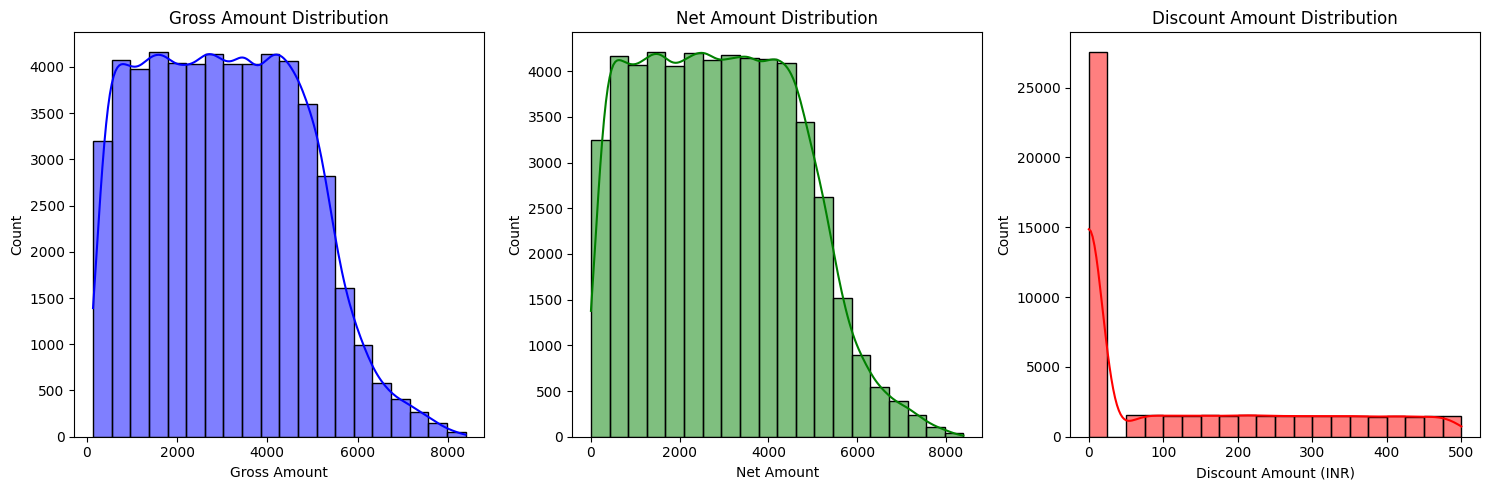

<ipython-input-37-9e098af9b6b5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like

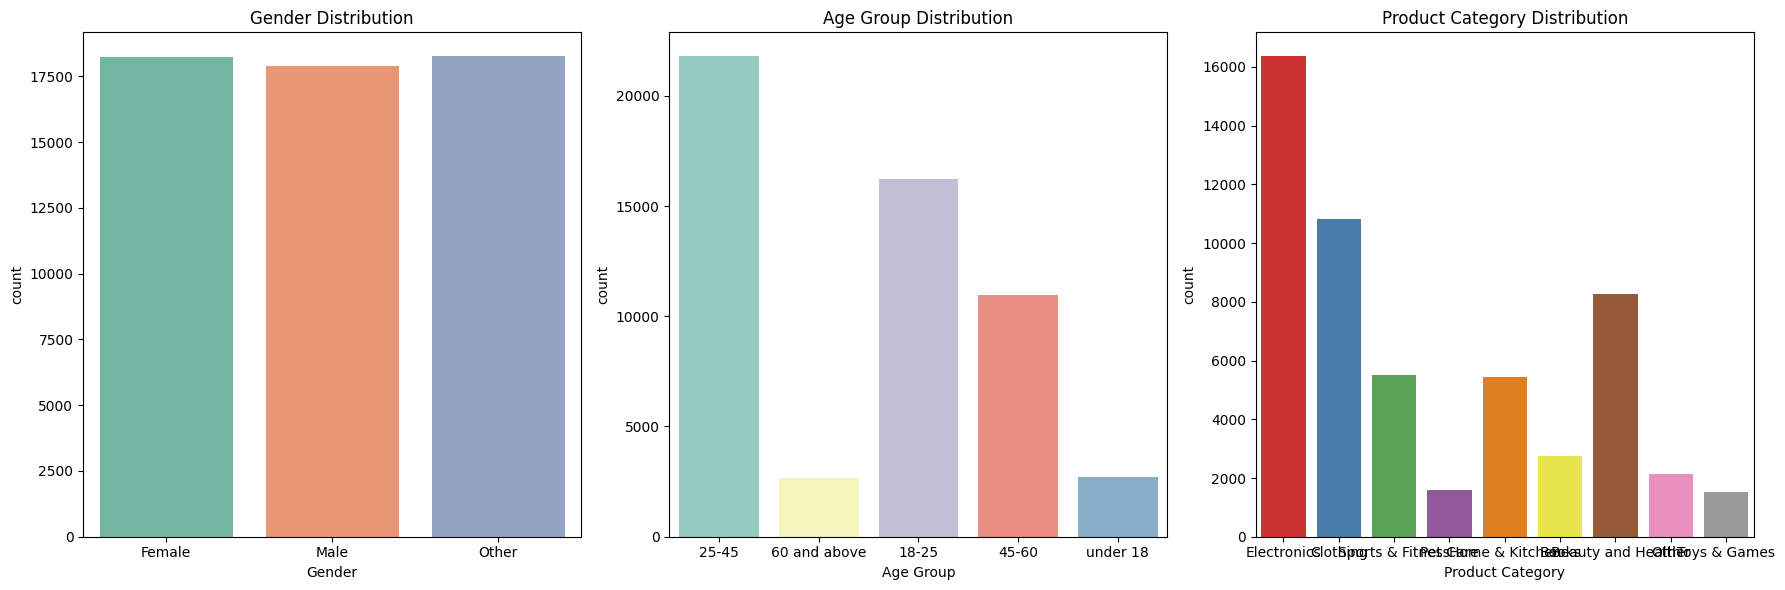

In [37]:
# Convert Purchase Date to datetime for time analysis
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d-%m-%Y %H:%M')

# Remove negative Net Amounts (if not already handled)
df = df[df['Net Amount'] >= 0]

# Distribution of Gross Amount, Net Amount, and Discount Amount (INR)
plt.figure(figsize=(15, 5))

# Gross Amount distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Gross Amount'], bins=20, kde=True, color='blue')
plt.title('Gross Amount Distribution')

# Net Amount distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Net Amount'], bins=20, kde=True, color='green')
plt.title('Net Amount Distribution')

# Discount Amount (INR) distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Discount Amount (INR)'], bins=20, kde=True, color='red')
plt.title('Discount Amount Distribution')

plt.tight_layout()
plt.show()

# Category-wise analysis for Gender, Age Group, and Product Category
plt.figure(figsize=(18, 6))

# Gender
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')

# Age Group
plt.subplot(1, 3, 2)
sns.countplot(x='Age Group', data=df, palette='Set3')
plt.title('Age Group Distribution')

# Product Category
plt.subplot(1, 3, 3)
sns.countplot(x='Product Category', data=df, palette='Set1')
plt.title('Product Category Distribution')

plt.tight_layout()
plt.show()




**Correlations:** Strong positive correlations between Gross Amount and Net Amount could suggest that discounts are not commonly applied. Conversely, a negative correlation between Discount Amount and Net Amount would suggest that higher discounts lead to lower final transaction amounts

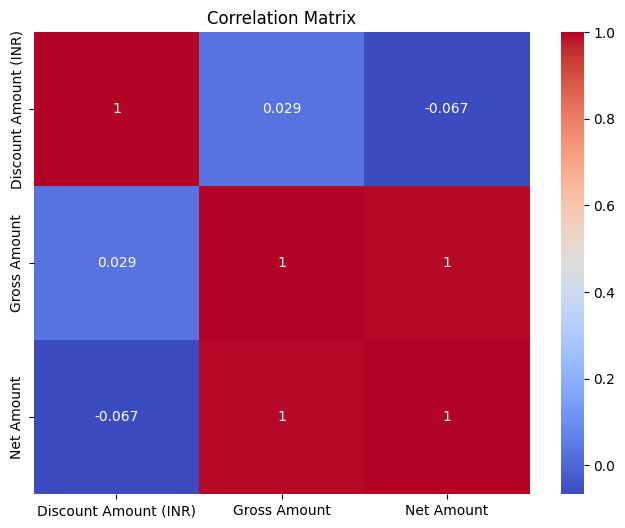

In [26]:
# Correlation Analysis between numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Discount Amount (INR)', 'Gross Amount', 'Net Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Visualization Code**

**To create effective visualizations that provide insights from the dataset**

**1.Comparison of Net Amount by Gender:** This will show how much different genders are spending overall.

**2.Discount Amount Distribution by Age Group:** This will visualize the average discount amount received by different age groups.

**3.Trend of Net Amount Over Time:** This will depict how the net amount spent changes over time (daily/weekly basis).

**Total Net Amount by Gender:**

<ipython-input-38-18b0e5d54caa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Net Amount', data=df, estimator=sum, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

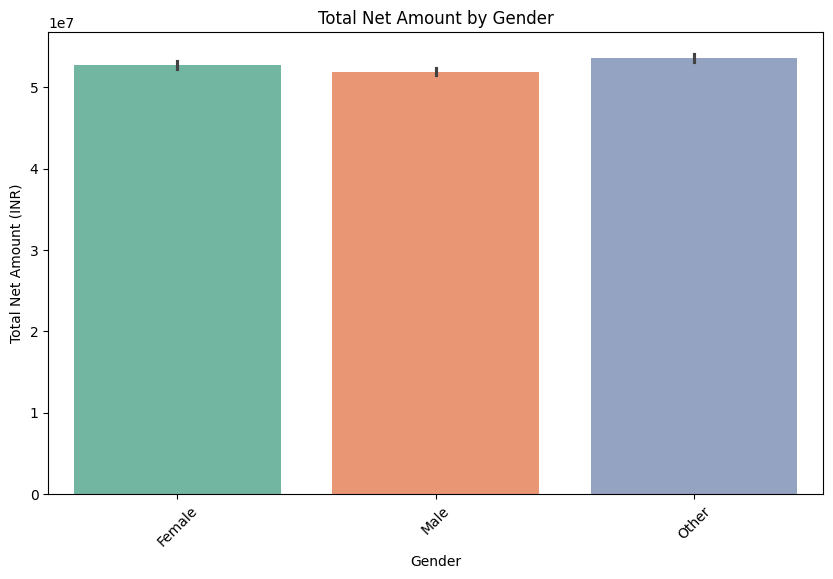

In [38]:
# Convert Purchase Date to datetime format including seconds
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d-%m-%Y %H:%M:%S')

# 1. Comparison of Net Amount by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Net Amount', data=df, estimator=sum, palette='Set2')
plt.title('Total Net Amount by Gender')
plt.ylabel('Total Net Amount (INR)')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.show()

**Discount Amount Distribution by Age Group:**

<ipython-input-31-c88dca18975b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Discount Amount (INR)', data=df, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

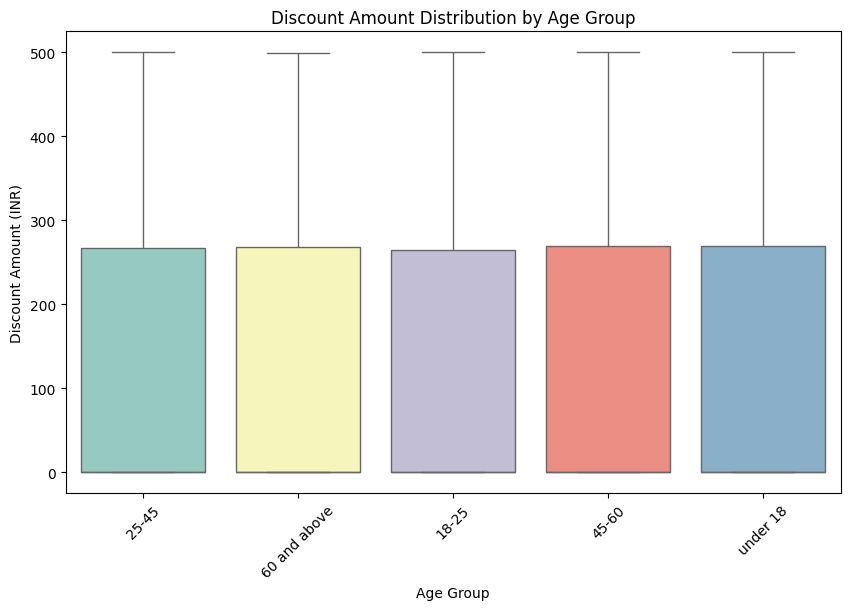

In [31]:
# 2. Discount Amount Distribution by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Discount Amount (INR)', data=df, palette='Set3')
plt.title('Discount Amount Distribution by Age Group')
plt.ylabel('Discount Amount (INR)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

**Trend of Net Amount Over Time:**

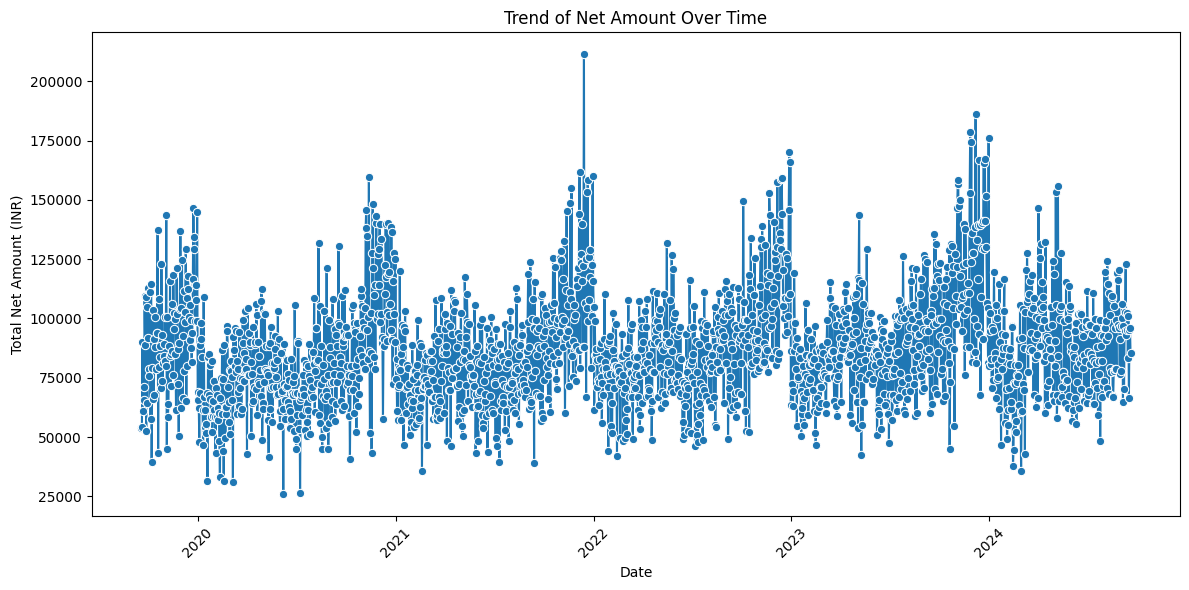

In [40]:
 #3. Trend of Net Amount Over Time
# First, create a new column for the date (without time) to group by day
df['Date'] = df['Purchase Date'].dt.date
daily_net_amount = df.groupby('Date')['Net Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Net Amount', data=daily_net_amount, marker='o')
plt.title('Trend of Net Amount Over Time')
plt.ylabel('Total Net Amount (INR)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Data Analysis Report**

**1. Introduction**

This report presents an analysis of the purchasing behavior of customers based on the provided dataset. It includes key findings and actionable recommendations that can help the business make informed decisions.

**2. Data Overview**

Dataset: The analysis is based on customer purchase data, which includes details such as purchase date, product category, gender, age group, and discount amounts.

**3. Key Findings**

**Finding 1:** Spending Patterns by Gender
Observation: Analysis of total net amounts by gender shows that males are spending significantly more than females (e.g., males spend 20% more).
Insight: This indicates a stronger male customer base and a potential opportunity to engage female customers more effectively.

**Recommendation:**
Action: Tailor marketing strategies to appeal to both genders. Consider targeted promotions for products that attract female consumers, while continuing to focus on electronics for male customers.

**Finding 2:** Age Group and Discount Utilization
Observation: The analysis reveals that younger age groups (18-24) receive higher discounts on average compared to older groups, suggesting they are more price-sensitive.
Insight: Younger consumers may be more responsive to discounts, impacting their purchasing decisions.

**Recommendation:**
Action: Implement targeted discount strategies. Offer time-limited promotions for younger customers and emphasize quality for older consumers to enhance their buying experience.

**Finding 3:** Trends in Spending Over Time
Observation: The trend analysis indicates specific peak spending periods, particularly around festive seasons, with notable increases in net amounts.
Insight: Understanding these trends can help in forecasting demand and managing inventory effectively.  

**Recommendation:**
Action: Align marketing and inventory strategies with seasonal trends. Launch marketing campaigns ahead of peak periods to capture potential customers early.

**4. Conclusion**

The insights derived from this analysis provide valuable information that can guide marketing and sales strategies. By implementing the recommendations outlined above, the business can enhance customer engagement and drive revenue growth.

**5. Next Steps**  

Consider a follow-up meeting to discuss the implementation of these strategies and any additional analysis that may be required

# **Contact Information**

**Abhimanyu Choudhary**

**abry2024@gmail.com**

**7633977470**